# Minimizar falsos positivos en compras presenciales

### Manuel Rodas 21509

In [106]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


df = pd.read_csv("dataset_feature_engineering.csv")


print("Shape:", df.shape)
df.head()


Shape: (1852394, 35)


,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,first_time_at_merchant,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,True,78.773821,1,1,0,2019,5,4,2,1
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,True,30.216618,1,1,0,2019,4,4,1,1
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,True,108.102912,1,1,0,2019,4,3,1,1
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,True,95.685115,1,1,0,2019,1,1,1,1
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,True,77.702395,1,1,0,2019,6,1,1,1


In [107]:

df.isnull().sum()


df.describe()


,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud,...,count_month_shopping_net,dist_between_client_and_merch,trans_month,trans_day,hour,year,times_shopped_at_merchant,times_shopped_at_merchant_year,times_shopped_at_merchant_month,times_shopped_at_merchant_day
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,...,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03,...,4.567241e+00,7.610956e+01,7.152067e+00,2.967456e+00,1.280612e+01,2.019501e+03,5.298079e+00,3.150459e+00,1.389109e+00,1.655442e+00
std,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02,...,4.575502e+00,2.909273e+01,3.424954e+00,2.197983e+00,6.815753e+00,4.999996e-01,3.094345e+00,1.865369e+00,6.722559e-01,9.025901e-01
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00,...,0.000000e+00,2.227351e-02,1.000000e+00,0.000000e+00,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00,...,1.000000e+00,5.534198e+01,4.000000e+00,1.000000e+00,7.000000e+00,2.019000e+03,3.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00
50%,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00,...,3.000000e+00,7.824823e+01,7.000000e+00,3.000000e+00,1.400000e+01,2.020000e+03,5.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00
75%,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00,...,7.000000e+00,9.847204e+01,1.000000e+01,5.000000e+00,1.900000e+01,2.020000e+03,7.000000e+00,4.000000e+00,2.000000e+00,2.000000e+00
max,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00,...,4.800000e+01,1.518682e+02,1.200000e+01,6.000000e+00,2.300000e+01,2.020000e+03,2.800000e+01,1.700000e+01,9.000000e+00,9.000000e+00


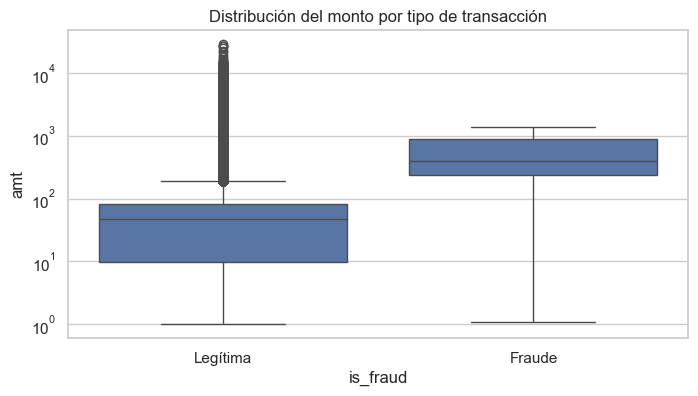

In [108]:

plt.figure(figsize=(8,4))
sns.boxplot(x='is_fraud', y='amt', data=df)
plt.yscale('log')
plt.title('Distribución del monto por tipo de transacción')
plt.xticks([0, 1], ['Legítima', 'Fraude'])
plt.show()


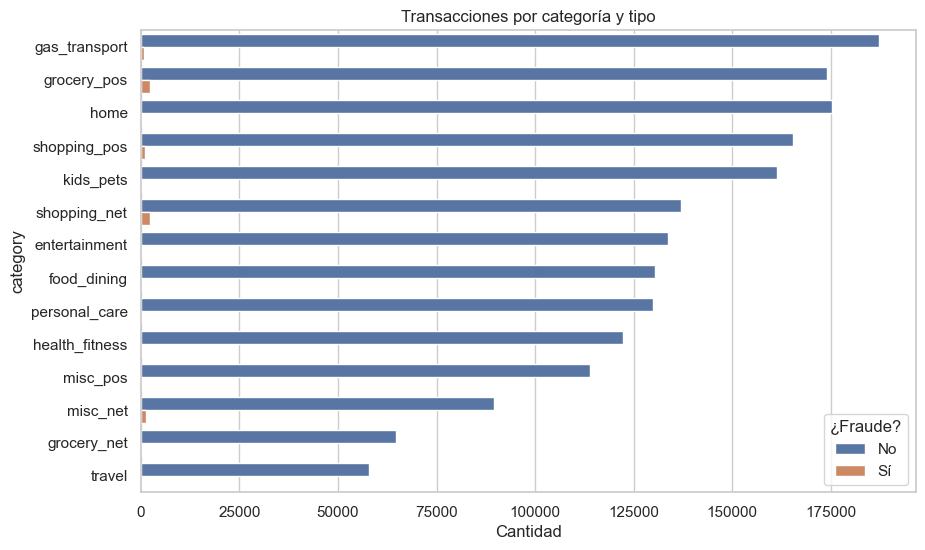

In [109]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, y='category', hue='is_fraud', order=df['category'].value_counts().index)
plt.title("Transacciones por categoría y tipo")
plt.xlabel("Cantidad")
plt.legend(title="¿Fraude?", labels=["No", "Sí"])
plt.show()


Porcentaje de fraude en compras POS: 0.79%


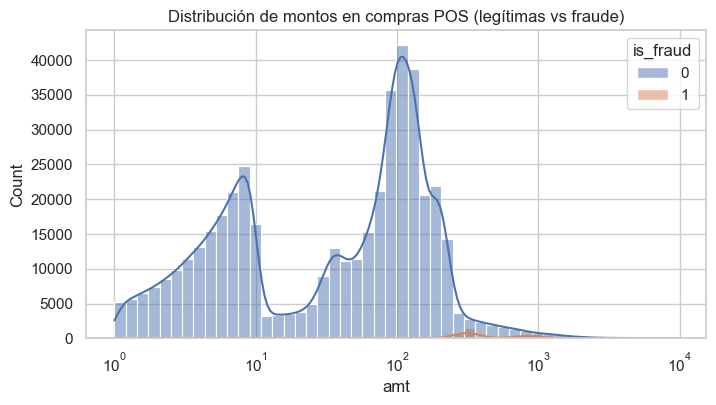

In [110]:

df_pos = df[df['category'].str.contains('pos')]


fraud_pos = df_pos['is_fraud'].mean()
print(f"Porcentaje de fraude en compras POS: {fraud_pos:.2%}")


plt.figure(figsize=(8,4))
sns.histplot(data=df_pos, x='amt', hue='is_fraud', bins=50, kde=True, log_scale=True)
plt.title("Distribución de montos en compras POS (legítimas vs fraude)")
plt.show()


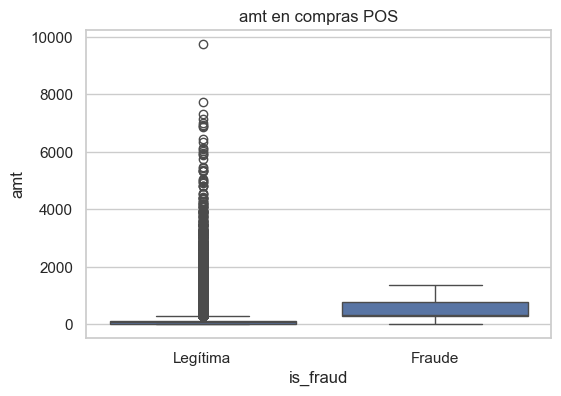

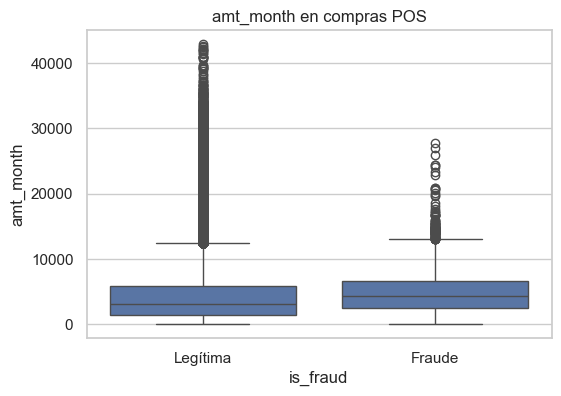

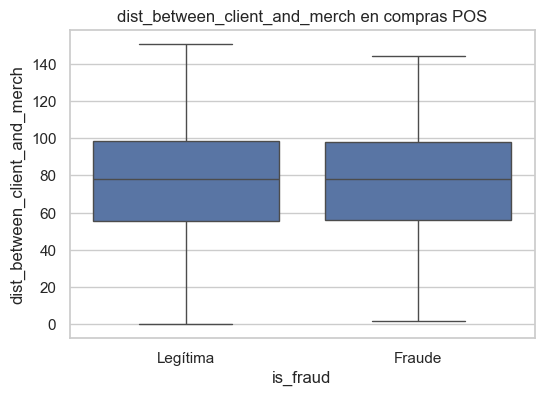

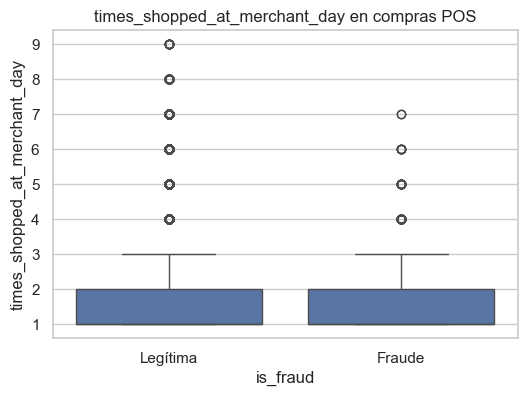

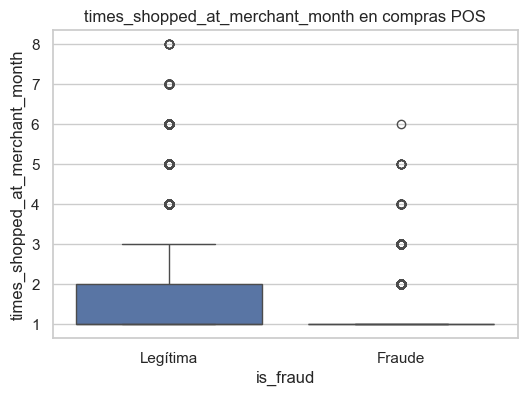

In [111]:

features_behavior = [
    'amt', 'amt_month', 'dist_between_client_and_merch',
    'times_shopped_at_merchant_day',
    'times_shopped_at_merchant_month'
]


for feature in features_behavior:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_pos, x='is_fraud', y=feature)
    plt.title(f"{feature} en compras POS")
    plt.xticks([0, 1], ['Legítima', 'Fraude'])
    plt.show()


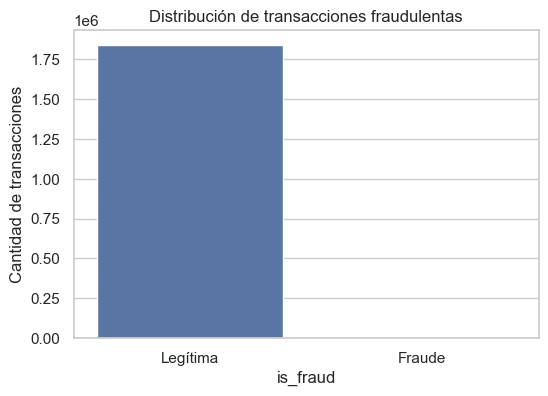

Porcentaje de fraude general: 0.52%


In [112]:

fraud_counts = df['is_fraud'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.xticks([0, 1], ['Legítima', 'Fraude'])
plt.ylabel("Cantidad de transacciones")
plt.title("Distribución de transacciones fraudulentas")
plt.show()


fraud_rate = df['is_fraud'].mean()
print(f"Porcentaje de fraude general: {fraud_rate:.2%}")


In [113]:
# Número de veces previas que el cliente ha comprado en ese comercio
df['has_shopped_here_before'] = df.groupby(['cc_num', 'merchant'])['trans_num'].cumcount()


In [114]:

df.sort_values(['cc_num', 'unix_time'], inplace=True)


df['prev_time'] = df.groupby('cc_num')['unix_time'].shift(1)
df['seconds_since_last'] = df['unix_time'] - df['prev_time']
df['seconds_since_last'].fillna(df['seconds_since_last'].median(), inplace=True)


/var/folders/p1/ylz0n_zj4991g1lpn_5mr1lc0000gn/T/ipykernel_74940/3577044524.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['seconds_since_last'].fillna(df['seconds_since_last'].median(), inplace=True)


In [115]:

df['is_night'] = df['hour'].apply(lambda x: 1 if x < 6 or x > 22 else 0)


In [116]:

df['dist_pop_ratio'] = df['dist_between_client_and_merch'] / (df['city_pop'] + 1)


In [117]:

selected_features = [
    'amt', 'amt_month', 'amt_year',
    'dist_between_client_and_merch',
    'dist_pop_ratio',
    'times_shopped_at_merchant_day',
    'times_shopped_at_merchant_month',
    'times_shopped_at_merchant_year',
    'has_shopped_here_before',
    'seconds_since_last',
    'is_night'
]

X = df[selected_features]
y = df['is_fraud']


X.isnull().sum()


amt                                0
amt_month                          0
amt_year                           0
dist_between_client_and_merch      0
dist_pop_ratio                     0
times_shopped_at_merchant_day      0
times_shopped_at_merchant_month    0
times_shopped_at_merchant_year     0
has_shopped_here_before            0
seconds_since_last                 0
is_night                           0
dtype: int64

In [118]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [120]:
model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='auc',
    use_label_encoder=False,
    random_state=42
)

model.fit(X_train, y_train)


/Users/manuelrodasgordillo/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [18:43:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [121]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

print("AUC:", roc_auc_score(y_test, y_pred_prob))
print("F1 Score:", f1_score(y_test, y_pred))


AUC: 0.9832570895551082
F1 Score: 0.5324459234608985


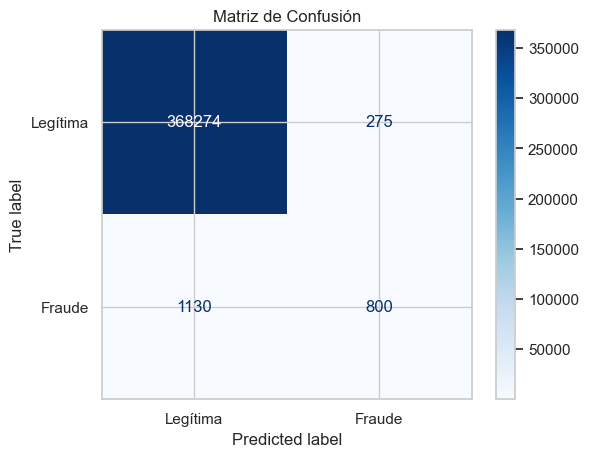

In [122]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Legítima", "Fraude"]).plot(cmap='Blues')
plt.title("Matriz de Confusión")
plt.show()


/var/folders/p1/ylz0n_zj4991g1lpn_5mr1lc0000gn/T/ipykernel_74940/3918070638.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  fp_pos = df_test_pos[(y_test == 0) & (y_pred == 1)]


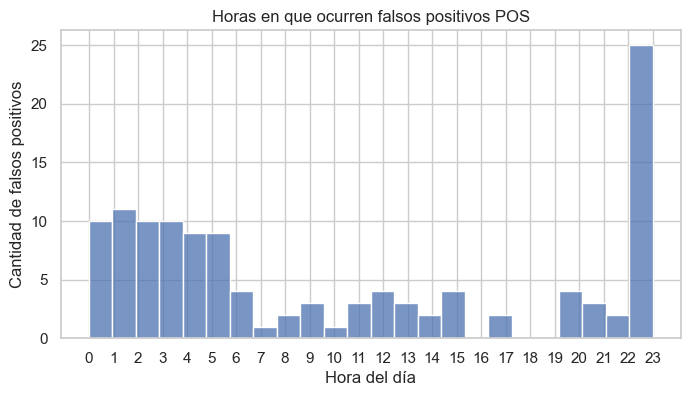

In [123]:

df_test = df.loc[X_test.index]


df_test_pos = df_test[df_test['category'].str.contains('pos', na=False)]


fp_pos = df_test_pos[(y_test == 0) & (y_pred == 1)]

# Visualización
plt.figure(figsize=(8, 4))
sns.histplot(fp_pos['hour'], bins=24)
plt.title("Horas en que ocurren falsos positivos POS")
plt.xlabel("Hora del día")
plt.ylabel("Cantidad de falsos positivos")
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()


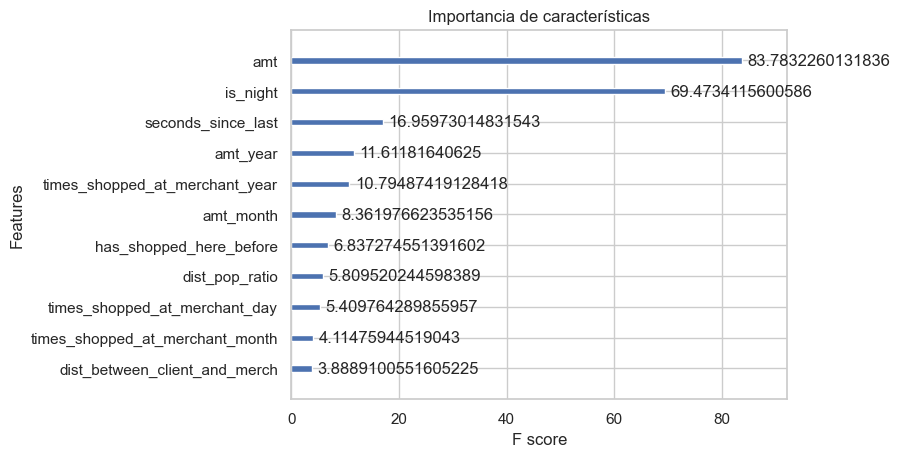

In [124]:
xgb.plot_importance(model, importance_type='gain')
plt.title("Importancia de características")
plt.show()


### Entrenamiento del modelo base con LightGBM

In [125]:
import pandas as pd
from lightgbm import LGBMClassifier
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [126]:

drop_cols = [
    'cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip',
    'job', 'dob', 'trans_num', 'unix_time'
]
df = df.drop(columns=drop_cols)

In [127]:

categorical_cols = ['category', 'gender']
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


X = df.drop(columns=['is_fraud'])
y = df['is_fraud']


In [128]:

X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


train_data = lgb.Dataset(X_train, label=y_train)
val_data = lgb.Dataset(X_val, label=y_val)


params = {
    'objective': 'binary',
    'metric': ['auc', 'binary_logloss'],
    'boosting_type': 'gbdt',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1
}


In [129]:
from lightgbm import LGBMClassifier, early_stopping, log_evaluation

model = LGBMClassifier(
    objective='binary',
    boosting_type='gbdt',
    learning_rate=0.05,
    num_leaves=31,
    feature_fraction=0.9,
    bagging_fraction=0.8,
    bagging_freq=5,
    verbose=-1,
    n_estimators=500
)


model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    callbacks=[
        early_stopping(stopping_rounds=30),
        log_evaluation(period=50)
    ]
)


y_pred_prob = model.predict_proba(X_val)[:, 1]
y_pred = model.predict(X_val)


Training until validation scores don't improve for 30 rounds
[50]	valid_0's binary_logloss: 0.00672952
[100]	valid_0's binary_logloss: 0.00557248
[150]	valid_0's binary_logloss: 0.00622064
Early stopping, best iteration is:
[131]	valid_0's binary_logloss: 0.00517678


In [130]:
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

print("ROC AUC:", roc_auc_score(y_val, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_val, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred))


ROC AUC: 0.9953715802190068

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.91      0.78      0.84      1930

    accuracy                           1.00    370479
   macro avg       0.95      0.89      0.92    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
 [[368393    156]
 [   434   1496]]


/var/folders/p1/ylz0n_zj4991g1lpn_5mr1lc0000gn/T/ipykernel_74940/4272449649.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance.head(20), x='Importance', y='Feature', palette='viridis')


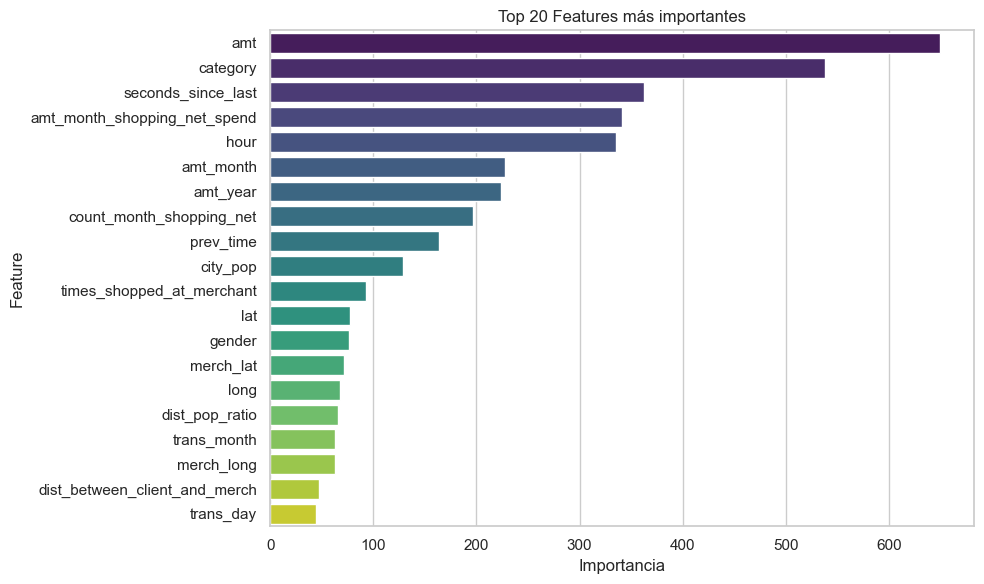

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


importances = model.feature_importances_
feature_names = X_train.columns

feat_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance.head(20), x='Importance', y='Feature', palette='viridis')
plt.title("Top 20 Features más importantes")
plt.xlabel("Importancia")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


| Métrica                     | Valor                          | Interpretación                                                   |
| --------------------------- | ------------------------------ | ---------------------------------------------------------------- |
| **TP (fraudes detectados)** | 1,496                          | Detectados correctamente como fraude.                            |
| **FP (falsos positivos)**   | 156                            | Transacciones legítimas marcadas como fraude.                    |
| **Ratio (TP + FP) / TP**    | (1496 + 156) / 1496 ≈ **1.10** | Es decir, **por cada fraude real, hay \~0.10 falsos positivos**. |
| **Recall (class 1)**        | 0.78                           | Se detecta el 78% del fraude.                                    |
| **Precision (class 1)**     | 0.91                           | 9% de las alertas son falsas.                                    |
| **ROC AUC**                 | 0.995                          | El modelo separa bien ambas clases.                              |


## Hiperparametros

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(title)
    plt.show()

def plot_prediction_distribution(y_true, y_pred_prob, title="Predicted Probabilities"):
    plt.figure(figsize=(8, 4))
    sns.histplot(y_pred_prob[y_true == 0], label="Clase 0", color='blue', stat='density', kde=True, bins=50)
    sns.histplot(y_pred_prob[y_true == 1], label="Clase 1", color='red', stat='density', kde=True, bins=50)
    plt.title(title)
    plt.xlabel("Probabilidad predicha")
    plt.legend()
    plt.show()

def plot_feature_importance(model, feature_names, title="Feature Importance"):
    importance = model.feature_importances_
    feat_imp_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values(by="Importance", ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
    plt.title(title)
    plt.show()


In [132]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score

def optimize_lgbm_with_custom_metric(X_train, y_train, X_val, y_val, eval_metric_fn, model_name="Model"):
    def objective(trial):
        params = {
            'objective': 'binary',
            'boosting_type': 'gbdt',
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
            'num_leaves': trial.suggest_int('num_leaves', 15, 63),
            'max_depth': trial.suggest_int('max_depth', 3, 12),
            'feature_fraction': trial.suggest_float('feature_fraction', 0.7, 1.0),
            'bagging_fraction': trial.suggest_float('bagging_fraction', 0.7, 1.0),
            'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
            'n_estimators': trial.suggest_int('n_estimators', 200, 600),
            'verbose': -1  # Esto va aquí, NO en .fit()
        }

        model = LGBMClassifier(**params)
        model.fit(
            X_train, y_train,
            eval_set=[(X_val, y_val)],
            eval_metric=eval_metric_fn,
            callbacks=[]  # Pruning desactivado para evitar error
        )

        y_pred_prob = model.predict_proba(X_val)[:, 1]
        return roc_auc_score(y_val, y_pred_prob)

    print(f"🔍 Buscando mejores hiperparámetros para: {model_name}")
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=30)

    print(f"✅ Mejores hiperparámetros encontrados para {model_name}:")
    print(study.best_params)

    return study.best_params


### Funciones Utilizadas

#### Primera funcion fp_ratio


¿Qué hace?
Calcula el ratio entre alertas totales (TP + FP) y fraudes reales detectados (TP).

Objetivo:
Minimizar la cantidad de falsos positivos por cada fraude detectado.

Se penaliza:
Cada falsa alarma aumenta la métrica.

In [133]:
def feval_fp_ratio_sklearn(y_true, y_pred):
    y_pred_labels = (y_pred > 0.5).astype(int)

    tp = ((y_pred_labels == 1) & (y_true == 1)).sum()
    fp = ((y_pred_labels == 1) & (y_true == 0)).sum()

    if tp == 0:
        ratio = float('inf')
    else:
        ratio = (tp + fp) / tp

    return 'fp_ratio', ratio, False


In [134]:
params_fp_ratio = optimize_lgbm_with_custom_metric(
    X_train, y_train, X_val, y_val,
    eval_metric_fn=feval_fp_ratio_sklearn,
    model_name="FP Ratio"
)


[I 2025-05-27 18:43:15,673] A new study created in memory with name: no-name-98cbc545-ce51-415f-bea5-804f017e8d76


🔍 Buscando mejores hiperparámetros para: FP Ratio


[I 2025-05-27 18:43:25,494] Trial 0 finished with value: 0.9978003065571935 and parameters: {'learning_rate': 0.012382247036688733, 'num_leaves': 55, 'max_depth': 9, 'feature_fraction': 0.7184586863962199, 'bagging_fraction': 0.8965739599387543, 'bagging_freq': 1, 'n_estimators': 332}. Best is trial 0 with value: 0.9978003065571935.
[I 2025-05-27 18:43:34,637] Trial 1 finished with value: 0.9969776433296592 and parameters: {'learning_rate': 0.05036366240819325, 'num_leaves': 27, 'max_depth': 9, 'feature_fraction': 0.8738500583596039, 'bagging_fraction': 0.7089461046735711, 'bagging_freq': 1, 'n_estimators': 392}. Best is trial 0 with value: 0.9978003065571935.
[I 2025-05-27 18:43:46,024] Trial 2 finished with value: 0.9003251843664126 and parameters: {'learning_rate': 0.09750142560986394, 'num_leaves': 46, 'max_depth': 10, 'feature_fraction': 0.9801088114894085, 'bagging_fraction': 0.9394571016003769, 'bagging_freq': 6, 'n_estimators': 355}. Best is trial 0 with value: 0.99780030655719

✅ Mejores hiperparámetros encontrados para FP Ratio:
{'learning_rate': 0.043915754585973424, 'num_leaves': 51, 'max_depth': 7, 'feature_fraction': 0.95103509275245, 'bagging_fraction': 0.9438690047227607, 'bagging_freq': 8, 'n_estimators': 545}


In [135]:
model_fp_ratio = LGBMClassifier(**params_fp_ratio)
model_fp_ratio.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.9438690047227607, bagging_freq=8,
               feature_fraction=0.95103509275245,
               learning_rate=0.043915754585973424, max_depth=7,
               n_estimators=545, num_leaves=51)

🔹 Modelo fp_ratio
ROC AUC: 0.9990692824403087

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.95      0.85      0.89      1930

    accuracy                           1.00    370479
   macro avg       0.97      0.92      0.95    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
 [[368460     89]
 [   298   1632]]


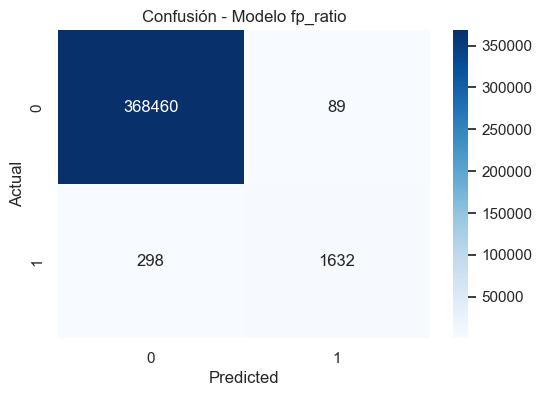

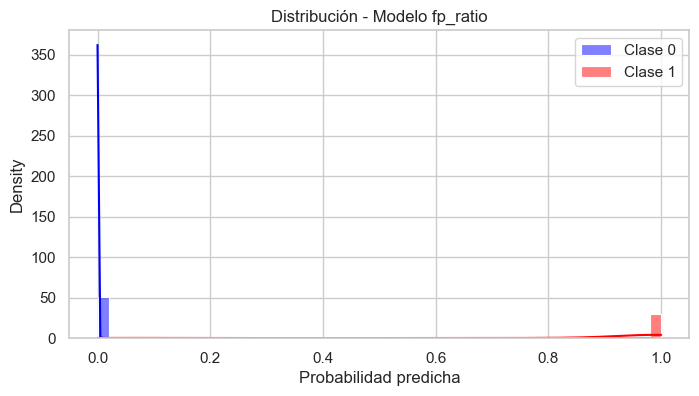

/var/folders/p1/ylz0n_zj4991g1lpn_5mr1lc0000gn/T/ipykernel_74940/1621186190.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


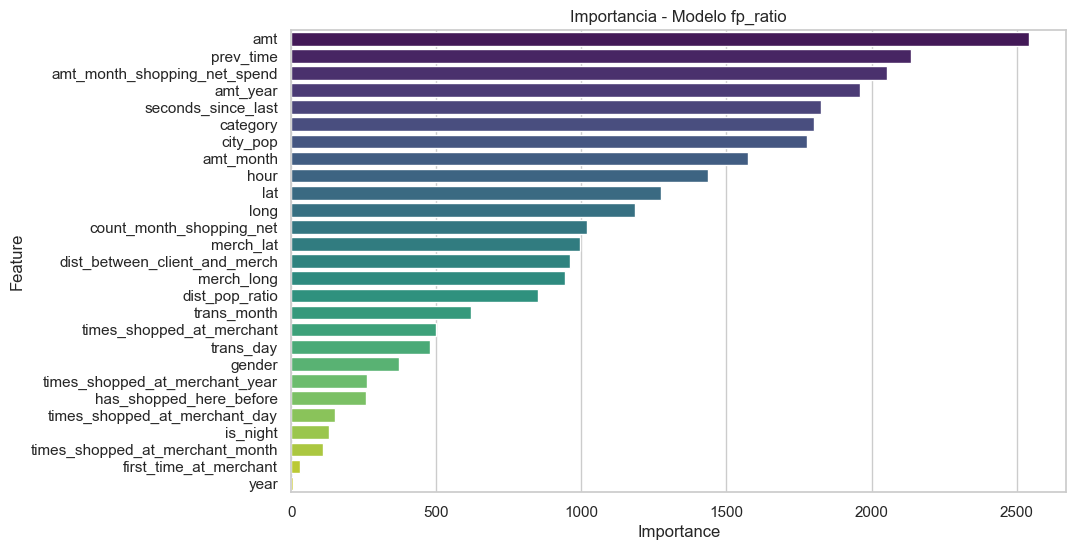

In [138]:

y_pred_prob_fp = model_fp_ratio.predict_proba(X_val)[:, 1]
y_pred_fp = model_fp_ratio.predict(X_val)


print("🔹 Modelo fp_ratio")
print("ROC AUC:", roc_auc_score(y_val, y_pred_prob_fp))
print("\nClassification Report:\n", classification_report(y_val, y_pred_fp))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_fp))


plot_confusion_matrix(y_val, y_pred_fp, title="Confusión - Modelo fp_ratio")
plot_prediction_distribution(y_val, y_pred_prob_fp, title="Distribución - Modelo fp_ratio")
plot_feature_importance(model_fp_ratio, X_train.columns, title="Importancia - Modelo fp_ratio")


| Métrica                     | Valor  | Interpretación                                                   |
| --------------------------- | ------ | ---------------------------------------------------------------- |
| **TP (fraudes detectados)** | 1,632  | Detectados correctamente como fraude.                            |
| **FP (falsos positivos)**   | 89     | Transacciones legítimas marcadas como fraude.                    |
| **Ratio (TP + FP) / TP**    | ≈ 1.05 | Es decir, **por cada fraude real, hay \~0.05 falsos positivos.** |
| **Recall (class 1)**        | 0.85   | Se detecta el 85% del fraude.                                    |
| **Precision (class 1)**     | 0.95   | 5% de las alertas son falsas.                                    |
| **ROC AUC**                 | 0.9991 | El modelo separa extremadamente bien ambas clases.               |



#### Segunda Funcion f1_fp_penalty


¿Qué hace?
Calcula el f1-score, pero le resta puntos si hay muchos falsos positivos.

Objetivo:
Mantener buen equilibrio entre precisión y recall, pero sin exagerar las alertas falsas.

Se penaliza:
Si los falsos positivos son altos en proporción, el puntaje baja.

In [139]:
from sklearn.metrics import f1_score

def feval_f1_fp_penalty(y_true, y_pred_prob):
    y_pred_labels = (y_pred_prob > 0.5).astype(int)

    f1 = f1_score(y_true, y_pred_labels)


    fp = ((y_pred_labels == 1) & (y_true == 0)).sum()
    tp = ((y_pred_labels == 1) & (y_true == 1)).sum()


    if tp == 0:
        penalty = 1.0
    else:
        penalty = fp / (tp + fp)

    final_score = f1 - penalty

    return 'f1_fp_penalty', final_score, True 


In [140]:
params_f1_penalty = optimize_lgbm_with_custom_metric(
    X_train, y_train, X_val, y_val,
    eval_metric_fn=feval_f1_fp_penalty,
    model_name="F1 FP Penalty"
)

[I 2025-05-27 18:54:09,395] A new study created in memory with name: no-name-62e65c0a-aea8-4d0b-b8ae-b08afc099eac


🔍 Buscando mejores hiperparámetros para: F1 FP Penalty


[I 2025-05-27 18:54:20,257] Trial 0 finished with value: 0.9904400195265126 and parameters: {'learning_rate': 0.013057799685815061, 'num_leaves': 63, 'max_depth': 3, 'feature_fraction': 0.8812223559057073, 'bagging_fraction': 0.8690710963399012, 'bagging_freq': 4, 'n_estimators': 376}. Best is trial 0 with value: 0.9904400195265126.
[I 2025-05-27 18:54:28,976] Trial 1 finished with value: 0.9892555902993165 and parameters: {'learning_rate': 0.05422529118673579, 'num_leaves': 19, 'max_depth': 9, 'feature_fraction': 0.8009354904090995, 'bagging_fraction': 0.738658570116406, 'bagging_freq': 1, 'n_estimators': 282}. Best is trial 0 with value: 0.9904400195265126.
[I 2025-05-27 18:54:38,164] Trial 2 finished with value: 0.8359531245042084 and parameters: {'learning_rate': 0.09982005951016551, 'num_leaves': 35, 'max_depth': 12, 'feature_fraction': 0.9075716763108014, 'bagging_fraction': 0.8734104330877406, 'bagging_freq': 4, 'n_estimators': 235}. Best is trial 0 with value: 0.990440019526512

✅ Mejores hiperparámetros encontrados para F1 FP Penalty:
{'learning_rate': 0.026781137361211984, 'num_leaves': 59, 'max_depth': 10, 'feature_fraction': 0.9281191326426674, 'bagging_fraction': 0.7142432540249093, 'bagging_freq': 7, 'n_estimators': 534}


In [141]:
model_f1_penalty = LGBMClassifier(**params_f1_penalty)
model_f1_penalty.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.7142432540249093, bagging_freq=7,
               feature_fraction=0.9281191326426674,
               learning_rate=0.026781137361211984, max_depth=10,
               n_estimators=534, num_leaves=59)

In [144]:
y_pred_prob_f1fp = model_f1_penalty.predict_proba(X_val)[:, 1]
y_pred_f1fp = model_f1_penalty.predict(X_val)

print("ROC AUC:", roc_auc_score(y_val, y_pred_prob_f1fp))
print("\nClassification Report:\n", classification_report(y_val, y_pred_f1fp))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_f1fp))


ROC AUC: 0.9989634015946334

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.95      0.84      0.89      1930

    accuracy                           1.00    370479
   macro avg       0.98      0.92      0.95    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
 [[368465     84]
 [   304   1626]]


🔹 Modelo f1_fp_penalty
ROC AUC: 0.9989634015946334

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.95      0.84      0.89      1930

    accuracy                           1.00    370479
   macro avg       0.98      0.92      0.95    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
 [[368465     84]
 [   304   1626]]


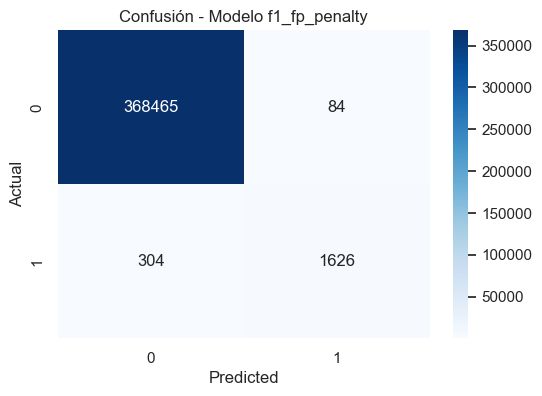

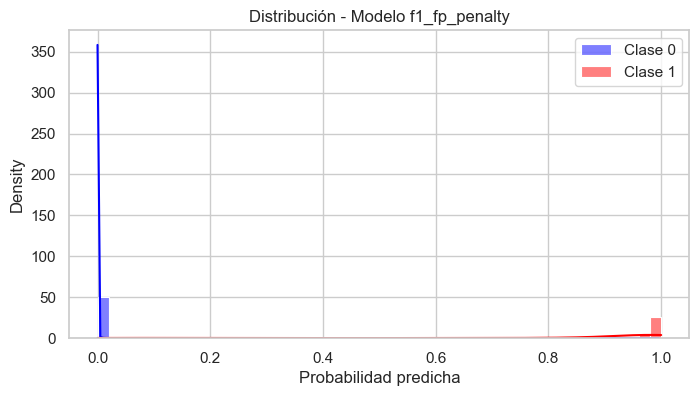

/var/folders/p1/ylz0n_zj4991g1lpn_5mr1lc0000gn/T/ipykernel_74940/1621186190.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


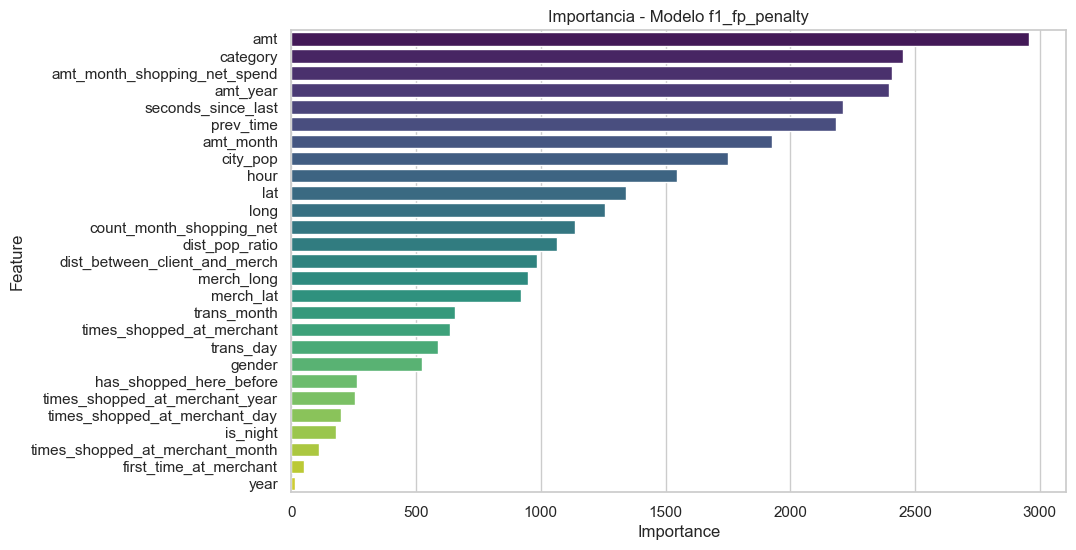

In [145]:

y_pred_prob_f1fp = model_f1_penalty.predict_proba(X_val)[:, 1]
y_pred_f1fp = model_f1_penalty.predict(X_val)


print("🔹 Modelo f1_fp_penalty")
print("ROC AUC:", roc_auc_score(y_val, y_pred_prob_f1fp))
print("\nClassification Report:\n", classification_report(y_val, y_pred_f1fp))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_f1fp))


plot_confusion_matrix(y_val, y_pred_f1fp, title="Confusión - Modelo f1_fp_penalty")
plot_prediction_distribution(y_val, y_pred_prob_f1fp, title="Distribución - Modelo f1_fp_penalty")
plot_feature_importance(model_f1_penalty, X_train.columns, title="Importancia - Modelo f1_fp_penalty")


| Métrica                     | Valor  | Interpretación                                                   |
| --------------------------- | ------ | ---------------------------------------------------------------- |
| **TP (fraudes detectados)** | 1,626  | Detectados correctamente como fraude.                            |
| **FP (falsos positivos)**   | 84     | Transacciones legítimas marcadas como fraude.                    |
| **Ratio (TP + FP) / TP**    | ≈ 1.05 | Es decir, **por cada fraude real, hay \~0.05 falsos positivos.** |
| **Recall (class 1)**        | 0.84   | Se detecta el 84% del fraude.                                    |
| **Precision (class 1)**     | 0.95   | 5% de las alertas son falsas.                                    |
| **ROC AUC**                 | 0.9989 | El modelo separa extremadamente bien ambas clases.               |



#### Tercera funcion recall_fp_limit

¿Qué hace?
Mide el recall (fraudes detectados), pero castiga fuertemente si los FP superan un límite que en este caso son 200.

Objetivo:
Maximizar la detección de fraudes, pero controlar las falsas alarmas dentro de un umbral aceptable.

Se penaliza:
Cuando el modelo genera más de cierto número de falsos positivos.

In [146]:
from sklearn.metrics import recall_score

def make_feval_recall_fp_limit(fp_limit=200):
    def feval_recall_fp_limit_inner(y_true, y_pred_prob):
        y_pred_labels = (y_pred_prob > 0.5).astype(int)

        recall = recall_score(y_true, y_pred_labels)
        fp = ((y_pred_labels == 1) & (y_true == 0)).sum()


        penalty = (fp - fp_limit) / fp_limit if fp > fp_limit else 0
        final_score = recall - penalty

        return 'recall_fp_limit', final_score, True
    return feval_recall_fp_limit_inner


In [147]:
params_recall_limit = optimize_lgbm_with_custom_metric(
    X_train, y_train, X_val, y_val,
    eval_metric_fn=make_feval_recall_fp_limit(fp_limit=200),
    model_name="Recall FP Limit"
)


[I 2025-05-27 19:10:22,618] A new study created in memory with name: no-name-3d02adc3-6602-4134-a2a3-adc51edb31df


🔍 Buscando mejores hiperparámetros para: Recall FP Limit


[I 2025-05-27 19:10:35,340] Trial 0 finished with value: 0.897996560014791 and parameters: {'learning_rate': 0.09747636768815429, 'num_leaves': 51, 'max_depth': 12, 'feature_fraction': 0.9944603046384582, 'bagging_fraction': 0.9147025244540878, 'bagging_freq': 7, 'n_estimators': 301}. Best is trial 0 with value: 0.897996560014791.
[I 2025-05-27 19:10:54,574] Trial 1 finished with value: 0.9977503149622317 and parameters: {'learning_rate': 0.01111216959086788, 'num_leaves': 32, 'max_depth': 11, 'feature_fraction': 0.8078556067508601, 'bagging_fraction': 0.9535572786407606, 'bagging_freq': 5, 'n_estimators': 451}. Best is trial 1 with value: 0.9977503149622317.
[I 2025-05-27 19:11:02,101] Trial 2 finished with value: 0.9851481816585381 and parameters: {'learning_rate': 0.08381426926907845, 'num_leaves': 22, 'max_depth': 12, 'feature_fraction': 0.7011568323594356, 'bagging_fraction': 0.9753071777601864, 'bagging_freq': 9, 'n_estimators': 204}. Best is trial 1 with value: 0.997750314962231

✅ Mejores hiperparámetros encontrados para Recall FP Limit:
{'learning_rate': 0.055163202825206335, 'num_leaves': 53, 'max_depth': 8, 'feature_fraction': 0.9779301954794356, 'bagging_fraction': 0.9462943401859479, 'bagging_freq': 10, 'n_estimators': 535}


In [148]:
model_recall_limit = LGBMClassifier(**params_recall_limit)
model_recall_limit.fit(X_train, y_train)

LGBMClassifier(bagging_fraction=0.9462943401859479, bagging_freq=10,
               feature_fraction=0.9779301954794356,
               learning_rate=0.055163202825206335, max_depth=8,
               n_estimators=535, num_leaves=53)

In [149]:
y_pred_prob_recall = model_recall_limit.predict_proba(X_val)[:, 1]
y_pred_recall = model_recall_limit.predict(X_val)

print("ROC AUC:", roc_auc_score(y_val, y_pred_prob_recall))
print("\nClassification Report:\n", classification_report(y_val, y_pred_recall))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_recall))


ROC AUC: 0.9991068741964796

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.94      0.84      0.89      1930

    accuracy                           1.00    370479
   macro avg       0.97      0.92      0.94    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
 [[368445    104]
 [   308   1622]]


🔹 Modelo recall_fp_limit
ROC AUC: 0.9991068741964796

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368549
           1       0.94      0.84      0.89      1930

    accuracy                           1.00    370479
   macro avg       0.97      0.92      0.94    370479
weighted avg       1.00      1.00      1.00    370479


Confusion Matrix:
 [[368445    104]
 [   308   1622]]


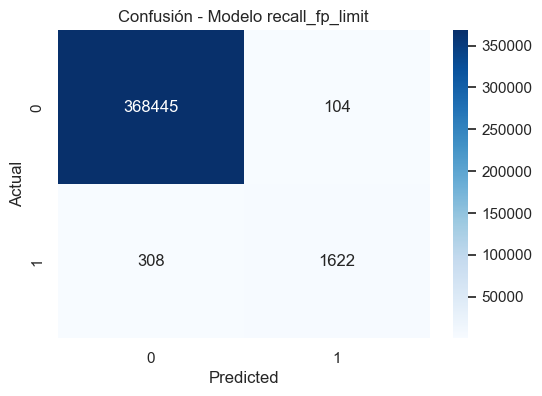

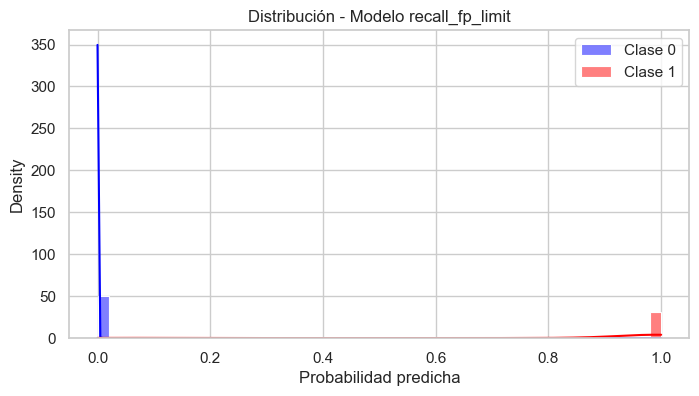

/var/folders/p1/ylz0n_zj4991g1lpn_5mr1lc0000gn/T/ipykernel_74940/1621186190.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')


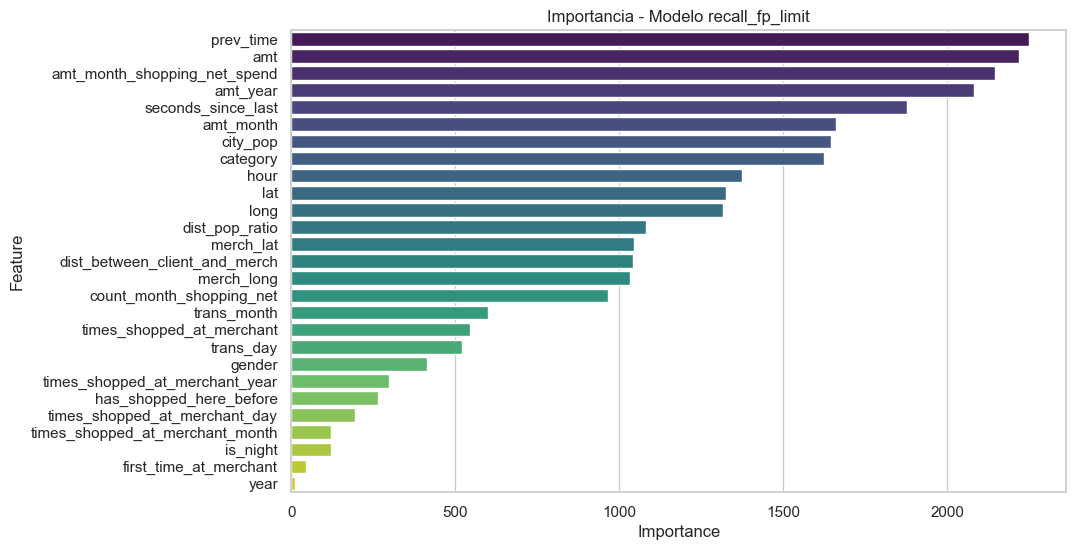

In [150]:

y_pred_prob_recall = model_recall_limit.predict_proba(X_val)[:, 1]
y_pred_recall = model_recall_limit.predict(X_val)


print("🔹 Modelo recall_fp_limit")
print("ROC AUC:", roc_auc_score(y_val, y_pred_prob_recall))
print("\nClassification Report:\n", classification_report(y_val, y_pred_recall))
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_pred_recall))


plot_confusion_matrix(y_val, y_pred_recall, title="Confusión - Modelo recall_fp_limit")
plot_prediction_distribution(y_val, y_pred_prob_recall, title="Distribución - Modelo recall_fp_limit")
plot_feature_importance(model_recall_limit, X_train.columns, title="Importancia - Modelo recall_fp_limit")


| Métrica                     | Valor  | Interpretación                                                   |
| --------------------------- | ------ | ---------------------------------------------------------------- |
| **TP (fraudes detectados)** | 1,622  | Detectados correctamente como fraude.                            |
| **FP (falsos positivos)**   | 104    | Transacciones legítimas marcadas como fraude.                    |
| **Ratio (TP + FP) / TP**    | ≈ 1.06 | Es decir, **por cada fraude real, hay \~0.06 falsos positivos.** |
| **Recall (class 1)**        | 0.84   | Se detecta el 84% del fraude.                                    |
| **Precision (class 1)**     | 0.94   | 6% de las alertas son falsas.                                    |
| **ROC AUC**                 | 0.9991 | El modelo separa extremadamente bien ambas clases.               |



### Metrica gaandora 

1. fp_ratio es el más balanceado: mejor recall, TP, y muy buena precisión.

2. f1_fp_penalty logra menos falsos positivos (FP) y mantiene excelentes métricas.

3. recall_fp_limit tiene el mejor ROC AUC, pero con más FP que los otros.



| Métrica                     | `fp_ratio` | `f1_fp_penalty` | `recall_fp_limit` | 🏆 Mejor modelo              |
| --------------------------- | ---------- | --------------- | ----------------- | ---------------------------- |
| **TP (fraudes detectados)** | **1,632**  | 1,626           | 1,622             | **`fp_ratio`**               |
| **FP (falsos positivos)**   | 89         | **84**          | 104               | **`f1_fp_penalty`**          |
| **Ratio (TP+FP)/TP**        | **1.05**   | **1.05**        | 1.06              | `fp_ratio` / `f1_fp_penalty` |
| **Recall (class 1)**        | **0.85**   | 0.84            | 0.84              | **`fp_ratio`**               |
| **Precision (class 1)**     | **0.95**   | **0.95**        | 0.94              | `fp_ratio` / `f1_fp_penalty` |
| **ROC AUC**                 | 0.99907    | 0.99896         | **0.99910**       | **`recall_fp_limit`**        |

